In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("../CSV_files/spreadspoke_scores.csv")
df




,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [3]:
five_year_df = df[df['schedule_season'] > 2018]
five_year_df.loc[five_year_df['schedule_season'] > 2018, 'team_favorite_id'] = five_year_df['team_favorite_id'].replace('LV', 'LVR')

five_year_df.head(10)




,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,-3.0,46.5,Soldier Field,False,NaN,NaN,NaN,NaN
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,indoor
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,-2.0,49.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,-5.5,44,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,indoor
12416,9/8/2019,2019,1,False,Jacksonville Jaguars,26,40,Kansas City Chiefs,KC,-3.5,49,TIAA Bank Field,False,NaN,NaN,NaN,NaN
12417,9/8/2019,2019,1,False,Los Angeles Chargers,30,24,Indianapolis Colts,LAC,-6.0,44.5,Dignity Health Sports Park,False,NaN,NaN,NaN,NaN
12418,9/8/2019,2019,1,False,Miami Dolphins,10,59,Baltimore Ravens,BAL,-7.0,40.5,Hard Rock Stadium,False,NaN,NaN,NaN,NaN
12419,9/8/2019,2019,1,False,Minnesota Vikings,28,12,Atlanta Falcons,MIN,-3.5,47,U.S. Bank Stadium,False,72.0,0.0,NaN,indoor
12420,9/8/2019,2019,1,False,New England Patriots,33,3,Pittsburgh Steelers,NE,-5.5,49,Gillette Stadium,False,NaN,NaN,NaN,NaN


In [4]:
#getting a count of favorites by team id
favorite_counts = five_year_df["team_favorite_id"].value_counts()
favorite_counts


team_favorite_id
KC     87
SF     73
BUF    69
BAL    66
DAL    62
TB     60
GB     59
PHI    58
LAR    55
NO     54
LAC    53
SEA    51
NE     50
MIN    49
CLE    49
IND    43
TEN    42
PIT    41
CIN    40
MIA    35
LVR    34
DEN    33
ATL    31
DET    29
ARI    26
JAX    24
CHI    24
HOU    23
CAR    21
WAS    20
NYJ    15
NYG    14
Name: count, dtype: int64

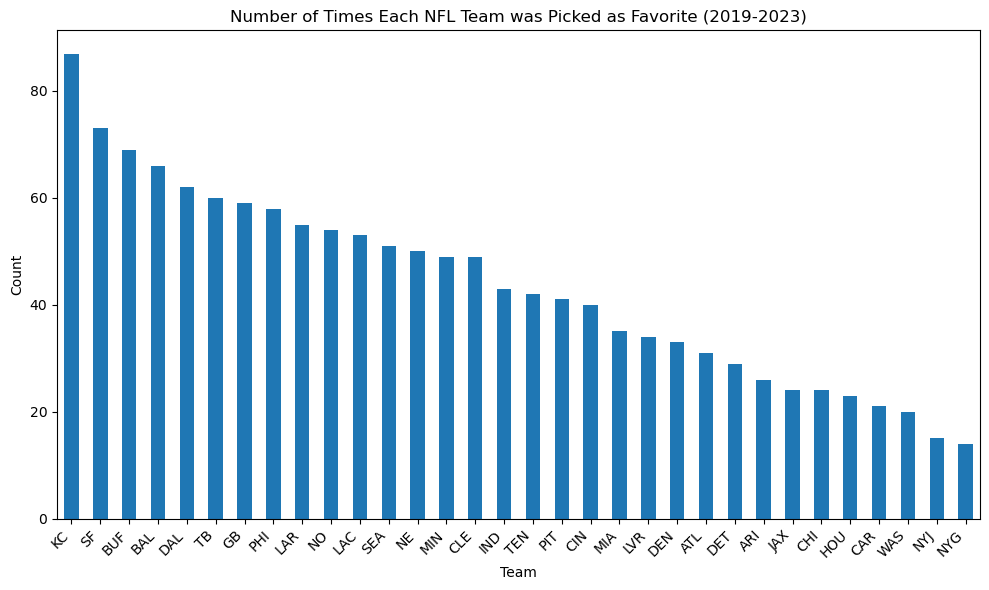

In [5]:
plt.figure(figsize=(10, 6))
favorite_counts.plot(kind='bar')
plt.title('Number of Times Each NFL Team was Picked as Favorite (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [6]:
#get a count of wins for chosen favorites by team
favorite_wins = five_year_df[five_year_df["score_home"] > five_year_df["score_away"]]["team_favorite_id"].value_counts()
favorite_wins

team_favorite_id
KC     48
BUF    41
GB     38
SF     37
DAL    36
PHI    34
BAL    33
CLE    32
TB     29
LAR    29
NO     28
LAC    26
CIN    24
IND    24
MIA    23
SEA    23
MIN    23
NE     23
PIT    22
LVR    22
DEN    19
TEN    18
ATL    18
DET    18
HOU    13
CHI    12
ARI    11
JAX     9
NYJ     8
NYG     7
WAS     7
CAR     6
Name: count, dtype: int64

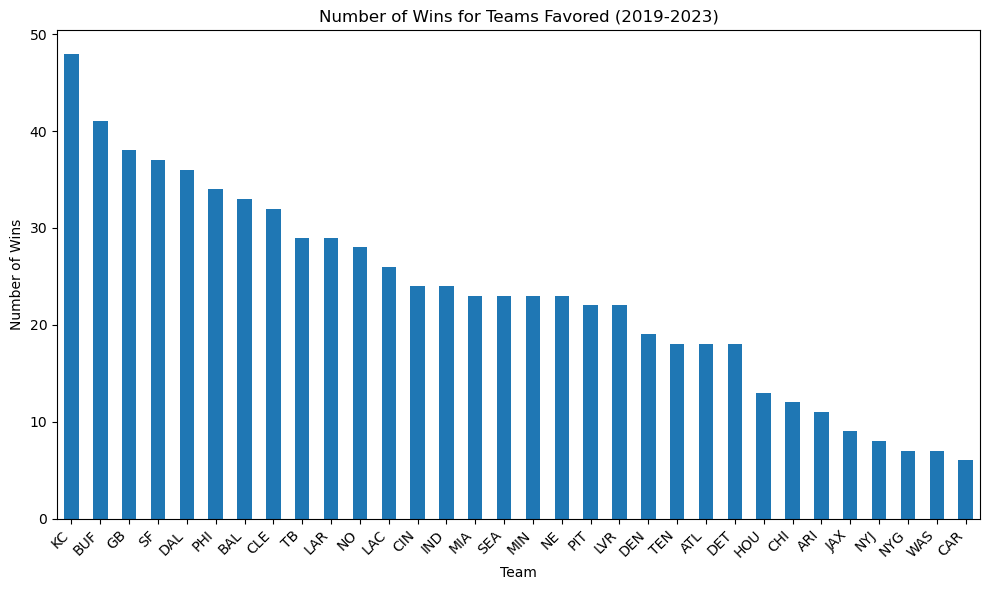

In [7]:
plt.figure(figsize=(10, 6))
favorite_wins.plot(kind='bar')
plt.title('Number of Wins for Teams Favored (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [8]:
#find out what percentage of time the favorite actually wins

win_percentage = (favorite_wins / favorite_counts) * 100
win_percentage_sorted = win_percentage.sort_values(ascending=False)

win_percentage_sorted

team_favorite_id
MIA    65.714286
CLE    65.306122
LVR    64.705882
GB     64.406780
DET    62.068966
CIN    60.000000
BUF    59.420290
PHI    58.620690
DAL    58.064516
ATL    58.064516
DEN    57.575758
HOU    56.521739
IND    55.813953
KC     55.172414
PIT    53.658537
NYJ    53.333333
LAR    52.727273
NO     51.851852
SF     50.684932
NYG    50.000000
CHI    50.000000
BAL    50.000000
LAC    49.056604
TB     48.333333
MIN    46.938776
NE     46.000000
SEA    45.098039
TEN    42.857143
ARI    42.307692
JAX    37.500000
WAS    35.000000
CAR    28.571429
Name: count, dtype: float64

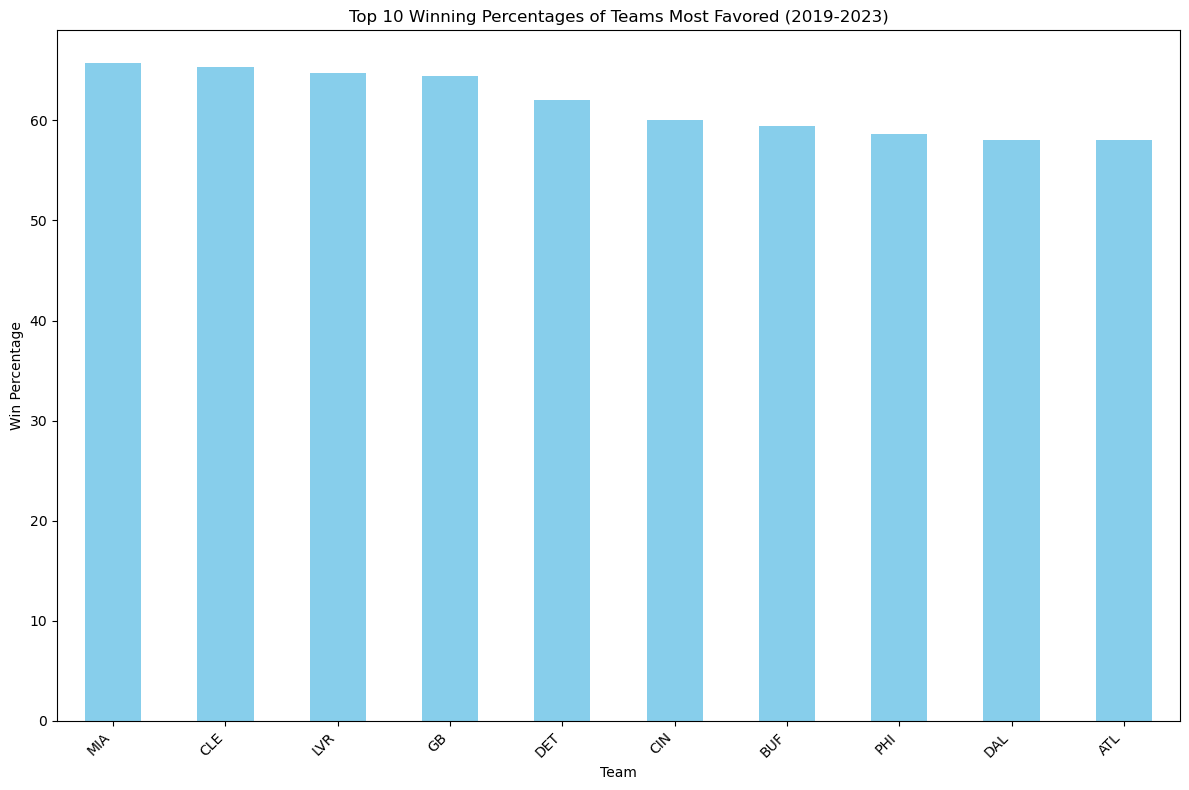

In [9]:
plt.figure(figsize=(12, 8))
win_percentage_sorted.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Winning Percentages of Teams Most Favored (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [10]:
favorite_counts_df = pd.DataFrame({'Team': favorite_counts.index, 'Count': favorite_counts.values})
favorite_counts_df.columns = ['Team', 'Count']
print(f"The top 10 most picked favorites are: {favorite_counts_df.head(10)}")


The top 10 most picked favorites are:   Team  Count
0   KC     87
1   SF     73
2  BUF     69
3  BAL     66
4  DAL     62
5   TB     60
6   GB     59
7  PHI     58
8  LAR     55
9   NO     54


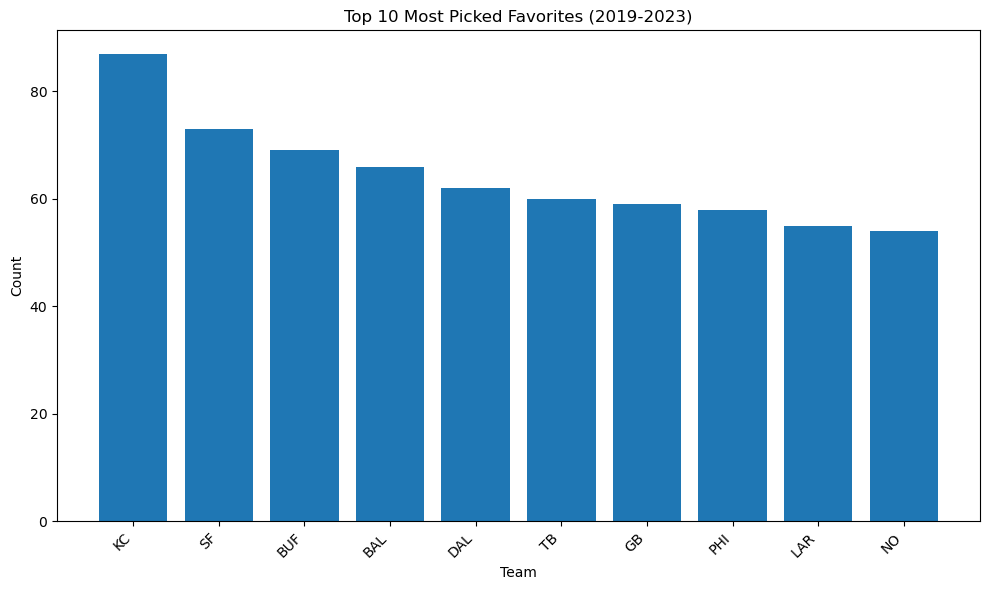

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(favorite_counts_df['Team'].head(10), favorite_counts_df['Count'].head(10))
plt.title('Top 10 Most Picked Favorites (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [12]:
#creating a data frame for winning percentages, as index and winning percentages
win_percentage_df = pd.DataFrame({"Team" : win_percentage.index, "Win Percentage" : win_percentage.values})
#renaming columns to Team and Win Percentage
win_percentage_df.columns = ['Team', 'Win Percentage']

win_percentage_df_sorted = win_percentage_df.sort_values(by='Win Percentage', ascending=False)
print(f"The top 10 winning percentages of teams most favorited are:\n{win_percentage_df_sorted.head(10)}")


The top 10 winning percentages of teams most favorited are:
   Team  Win Percentage
19  MIA       65.714286
7   CLE       65.306122
18  LVR       64.705882
11   GB       64.406780
10  DET       62.068966
6   CIN       60.000000
3   BUF       59.420290
25  PHI       58.620690
8   DAL       58.064516
1   ATL       58.064516


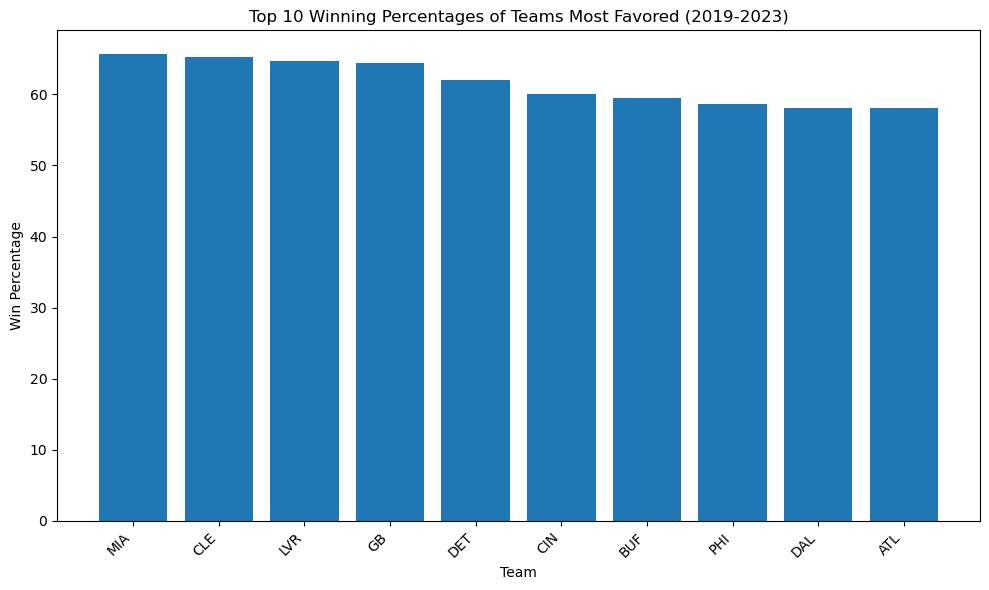

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(win_percentage_df_sorted['Team'].head(10), win_percentage_df_sorted['Win Percentage'].head(10))
plt.title('Top 10 Winning Percentages of Teams Most Favored (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [14]:
correlation_df = pd.merge(favorite_counts_df, favorite_wins, left_on='Team', right_index=True, how='outer')
correlation_df.columns = ['Team', 'Favorite Picks', 'Favorite Wins']
correlation_df['Win Percentage'] = (correlation_df['Favorite Wins'] / correlation_df['Favorite Picks']) * 100
correlation_df = correlation_df.sort_values(by='Favorite Picks', ascending=False)
print(correlation_df.head(10))


  Team  Favorite Picks  Favorite Wins  Win Percentage
0   KC              87             48       55.172414
1   SF              73             37       50.684932
2  BUF              69             41       59.420290
3  BAL              66             33       50.000000
4  DAL              62             36       58.064516
5   TB              60             29       48.333333
6   GB              59             38       64.406780
7  PHI              58             34       58.620690
8  LAR              55             29       52.727273
9   NO              54             28       51.851852


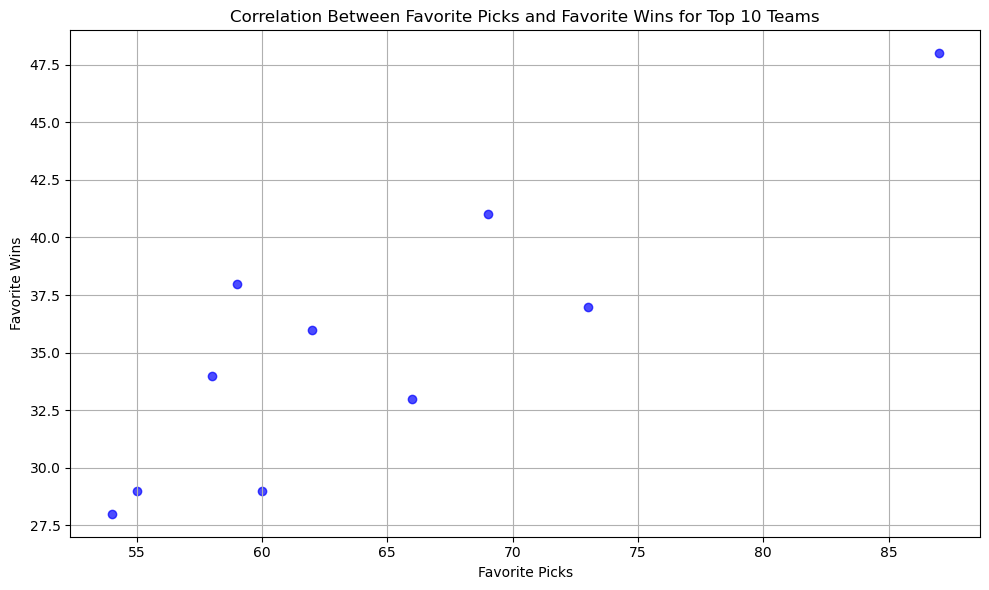

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(correlation_df['Favorite Picks'].head(10), correlation_df['Favorite Wins'].head(10), color='blue', alpha=0.7)
plt.title('Correlation Between Favorite Picks and Favorite Wins for Top 10 Teams')
plt.xlabel('Favorite Picks')
plt.ylabel('Favorite Wins')
plt.grid(True)
plt.tight_layout()
plt.show()